# Question

수심 $h_{0} = 10m$인 상황에서 파고 $H = 2.0m$인 파가 입사하고 있다.

## Question 1

1. 수심 $h_{0}$에서 $kh = \pi$ 만족하는 주기 $T_{0}$를 구하시오.

In [1931]:
import math
import numpy as np

In [1932]:
h0 = 10
H1 = 2.0
g = 9.81

In [1933]:
h = h0

k = math.pi / h

In [1934]:
k0 = k

In [1935]:
k

0.3141592653589793

In [1936]:
sqr_sigma = g * k * np.tanh([k*h])

In [1937]:
sqr_sigma

array([3.0704133])

In [1938]:
sigma = math.sqrt(sqr_sigma)

In [1939]:
sigma

1.7522594830545946

In [1940]:
T0 = 2 * math.pi / sigma

In [1941]:
T0

3.5857619079490086

In [1942]:
sigma / k0

5.577615166155759

## Question 2

2. 시작점에서 $\Delta{x} = 1m$ 간격으로 파고의 높이를 계산하여 그래프를 그리시오.

In [1943]:
C1 = sigma / k0

In [1944]:
C1

5.577615166155759

In [1945]:
N1 = 0.5

In [1946]:
N1

0.5

In [1947]:
h = []
k = []
C = []
N = []
H = []

In [1948]:
def f(x, sqr_omega, h1):
    return g * (x / sqr_omega) * np.tanh([x*h1]) - 1

In [1949]:
def bisection_method(k_init, sqr_omega, h1):
    error=0.5 * 10**(-6)

    a = -100 + k_init
    b = 100 + k_init
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_omega, h1) == 0:
            break
        elif f(a, sqr_omega, h1)*f(c, sqr_omega, h1) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    return c

In [1950]:
# h1 = 10 - (1/10)*(i+1)
# k_init = sqr_sigma / (g * math.sqrt(np.tanh([sqr_sigma / g * h1])))

# k1 = bisection_method(k_init, sqr_sigma)

# k1 = abs(k1)

In [1951]:
H.append(H1)

In [1952]:
eckart_k = []

In [1953]:
h.append(h0)

In [1954]:
for i in range(0, 99):
    h1 = round(10 - (1/10)*(i+1), 2)
    k_init = sqr_sigma / (g * math.sqrt(np.tanh([sqr_sigma / g * h1])))
    k1 = abs(bisection_method(k_init, sqr_sigma, h1))
    C2 = sigma / k1
    N2 = 1/2 * (1 + 2*k1*h1/np.sinh([2*k1*h1]))
    H2 = H1 * math.sqrt((C1 * N1) / (C2 * N2))
    print(h1)
    eckart_k.append(k_init)
    h.append(h1)
    k.append(k1)
    C.append(C2)
    N.append(N2)
    H.append(H2)

9.9
9.8
9.7
9.6
9.5
9.4
9.3
9.2
9.1
9.0
8.9
8.8
8.7
8.6
8.5
8.4
8.3
8.2
8.1
8.0
7.9
7.8
7.7
7.6
7.5
7.4
7.3
7.2
7.1
7.0
6.9
6.8
6.7
6.6
6.5
6.4
6.3
6.2
6.1
6.0
5.9
5.8
5.7
5.6
5.5
5.4
5.3
5.2
5.1
5.0
4.9
4.8
4.7
4.6
4.5
4.4
4.3
4.2
4.1
4.0
3.9
3.8
3.7
3.6
3.5
3.4
3.3
3.2
3.1
3.0
2.9
2.8
2.7
2.6
2.5
2.4
2.3
2.2
2.1
2.0
1.9
1.8
1.7
1.6
1.5
1.4
1.3
1.2
1.1
1.0
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


In [1955]:
1.752 / 0.31423356

5.575470678561513

In [1956]:
k[0]

array([0.31423356])

In [1957]:
eckart_k[0]

array([0.31362574])

In [1958]:
abs(eckart_k[0] - k[0]) * 100

array([0.06078205])

In [1959]:
len(H)

100

In [1960]:
import matplotlib.pyplot as plt

In [1961]:
X = np.arange(0, 100)

In [1962]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

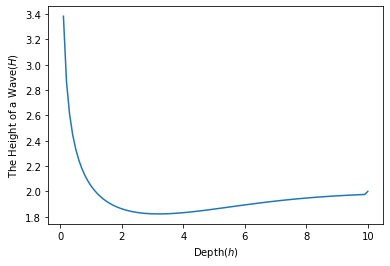

In [1963]:
plt.plot(h, H)
plt.xlabel("Depth($h$)")
plt.ylabel('The Height of a Wave($H$)')
plt.show()

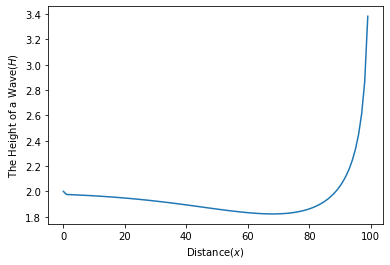

In [1964]:
plt.plot(X, H)
plt.xlabel("Distance($x$)")
plt.ylabel('The Height of a Wave($H$)')
plt.show()

In [1965]:
N1 = 1/2 * (1 + 2*k0*h0/np.sinh([2*k0*h0]))

In [1966]:
h = []
k = []
C = []
N = []
H = []
Bisection_H = []

In [1967]:
Bisection_H.append(H1)

In [1968]:
def f(x, sqr_omega, h1):
    return g * (x / sqr_omega) * np.tanh([x*h1]) - 1

In [1969]:
def bisection_method(k_init, sqr_omega, h1):
    error=0.5 * 10**(-6)

    a = -100 + k_init
    b = 100 + k_init
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_omega, h1) == 0:
            break
        elif f(a, sqr_omega, h1)*f(c, sqr_omega, h1) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    return c

In [1970]:
H.append(H1)

In [1971]:
h.append(h0)

In [1972]:
bisection_k = []

In [1973]:
bisection_k.append(k0)

In [1974]:
for i in range(0, 99):
    h1 = round(10 - (1/10)*(i+1), 2)
    k_init = sqr_sigma / (g * math.sqrt(np.tanh([sqr_sigma / g * h1])))
    k1 = abs(bisection_method(k_init, sqr_sigma, h1))
    C2 = sigma / k1
    N2 = 1/2 * (1 + 2*k1*h1/np.sinh([2*k1*h1]))
    H2 = H1 * math.sqrt((C1 * N1) / (C2 * N2))
    bisection_k.append(k1)
    h.append(h1)
    k.append(k1)
    C.append(C2)
    N.append(N2)
    H.append(H2)
    Bisection_H.append(H2)

In [1975]:
import matplotlib.pyplot as plt

In [1976]:
X = np.arange(0, 100)

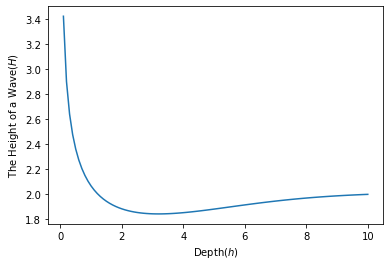

In [1977]:
plt.plot(h, H)
plt.xlabel("Depth($h$)")
plt.ylabel('The Height of a Wave($H$)')
plt.show()

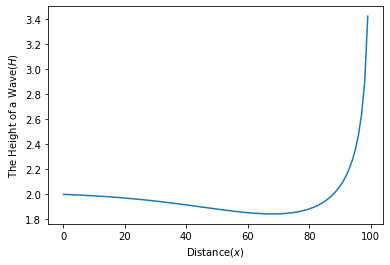

In [1978]:
plt.plot(X, H)
plt.xlabel("Distance($x$)")
plt.ylabel('The Height of a Wave($H$)')
plt.show()

In [1979]:
N1 = 1/2 * (1 + 2*k0*h0/np.sinh([2*k0*h0]))

In [1980]:
h = []
k = []
C = []
N = []
H = []
Eckart_H = []

In [1981]:
Eckart_H.append(H1)

In [1982]:
h.append(h0)

In [ ]:
H.append(H1)
Eckart_H.append(H1)

In [ ]:
eckart_k = []

In [ ]:
eckart_k.append(k0)

In [ ]:
for i in range(0, 99):
    h1 = round(10 - (1/10)*(i+1), 2)
    k1 = sqr_sigma / (g * math.sqrt(np.tanh([sqr_sigma / g * h1])))
    C2 = sigma / k1
    N2 = 1/2 * (1 + 2*k1*h1/np.sinh([2*k1*h1]))
    H2 = H1 * math.sqrt((C1 * N1) / (C2 * N2))
    h.append(h1)
    k.append(k1)
    eckart_k.append(k1)
    C.append(C2)
    N.append(N2)
    H.append(H2)
    Eckart_H.append(H2)

In [ ]:
len(H)

100

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = np.arange(0, 100)

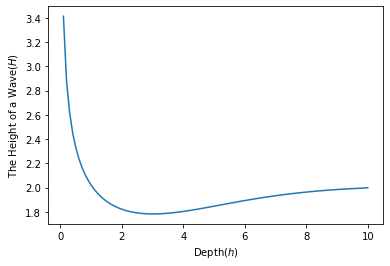

In [ ]:
plt.plot(h, H)
plt.xlabel("Depth($h$)")
plt.ylabel('The Height of a Wave($H$)')
plt.show()

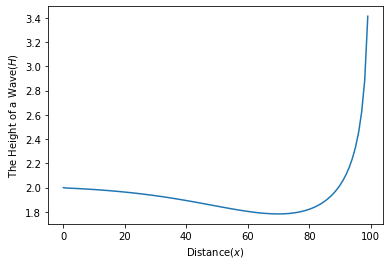

In [ ]:
plt.plot(X, H)
plt.xlabel("Distance($x$)")
plt.ylabel('The Height of a Wave($H$)')
plt.show()

In [ ]:
hunt_k = []

In [ ]:
d = [0.6666666666, 0.3555555555, 0.1608465608, 0.0632098765, 0.0217540484, 0.0076507983]

In [ ]:
h = []
k = []
C = []
N = []
H = []
Hunt_H = []

In [ ]:
Hunt_H.append(H1)

In [ ]:
h.append(h0)
H.append(H1)

In [ ]:
added_y = []

In [ ]:
hunt_k.append(k0)

In [ ]:
for i in range(0, 99):
    h1 = round(10 - (1/10)*(i+1), 2)
    
    y = sqr_sigma*h1/g
    added_y.append(y)
    dny = 0
    
    for j in range(0, len(d)):
        dny += d[j] * (y ** (j+1))

    k1 = math.sqrt(((y) ** 2 + ((y) / (1 + dny))) / (h1 ** 2))
    hunt_k.append(k1)

    C2 = sigma / k1
    N2 = 1/2 * (1 + 2*k1*h1/np.sinh([2*k1*h1]))
    H2 = H1 * math.sqrt((C1 * N1) / (C2 * N2))
    h.append(h1)
    k.append(k1)
    C.append(C2)
    N.append(N2)
    H.append(H2)
    Hunt_H.append(H2)
    

In [ ]:
abs_Eckart_H = 0
abs_Hunt_H = 0 

In [ ]:
for i in range(0, len(Bisection_H)):
    abs_Eckart_H += abs(Bisection_H[i] - Eckart_H[i])
    abs_Hunt_H += abs(Bisection_H[i] - Hunt_H[i])
    

In [ ]:
mean_abs_Eckart_H = abs_Eckart_H / len(Bisection_H)
mean_abs_Hunt_H = abs_Hunt_H / len(Bisection_H)

In [ ]:
mean_abs_Eckart_H * 100

4.498388630255303

In [ ]:
mean_abs_Hunt_H * 100

0.08965452942100072

In [ ]:
len(hunt_k)

100

In [ ]:
len(k)

99

/home/hexk0131/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


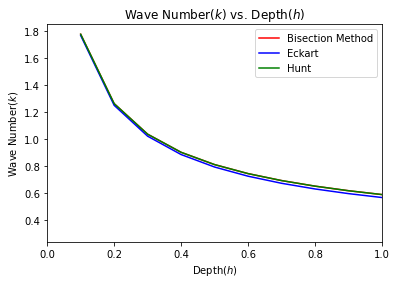

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, bisection_k, color='r', label='Bisection Method')
plt.plot(h, eckart_k, color='b', label='Eckart')
plt.plot(h, hunt_k, color='g', label='Hunt')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h$)")
plt.ylabel("Wave Number($k$)")
plt.title("Wave Number($k$) vs. Depth($h$)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
plt.xlim(0, 1)
  
# To load the display window
plt.show()

In [ ]:
abs_Hunt_k = 0
abs_Eckart_k = 0

In [ ]:
for i in range(0, len(hunt_k)):
    abs_Hunt_k += abs(hunt_k[i] - bisection_k[i])
    abs_Eckart_k += abs(eckart_k[i] - bisection_k[i])


In [ ]:
mean_abs_Hunt_k = abs_Hunt_k / len(bisection_k)
mean_abs_Eckart_k = abs_Eckart_k / len(bisection_k)

In [ ]:
mean_abs_Hunt_k * 100

array([0.02306469])

In [ ]:
mean_abs_Eckart_k * 100

array([1.00575799])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = np.arange(0, 100)

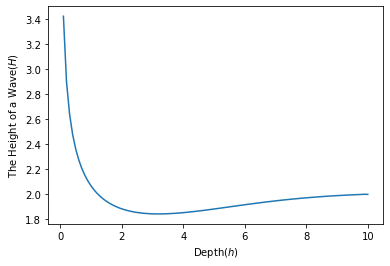

In [ ]:
plt.plot(h, H)
plt.xlabel("Depth($h$)")
plt.ylabel('The Height of a Wave($H$)')
plt.show()

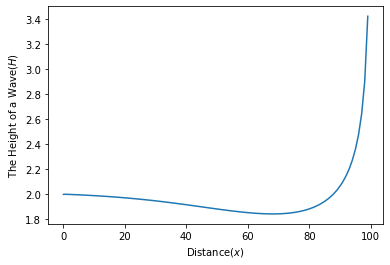

In [ ]:
plt.plot(X, H)
plt.xlabel("Distance($x$)")
plt.ylabel('The Height of a Wave($H$)')
plt.show()

In [ ]:
Bisection_C = []
Eckart_C = []
Hunt_C = []

In [ ]:
Bisection_C.append(C1)
Eckart_C.append(C1)
Hunt_C.append(C1)

In [ ]:
for i in range(0, len(bisection_k)):
    Bisection_C.append((2 * math.pi / bisection_k[i])/T0)

In [ ]:
for i in range(0, len(eckart_k)):
    Eckart_C.append((2 * math.pi / eckart_k[i])/T0)

In [ ]:
for i in range(0, len(hunt_k)):
    Hunt_C.append((2 * math.pi / hunt_k[i])/T0)

/home/hexk0131/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


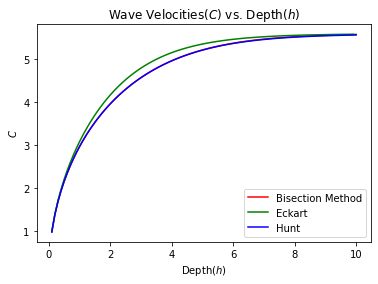

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, Bisection_C, color='r', label='Bisection Method')
plt.plot(h, Eckart_C, color='g', label='Eckart')
plt.plot(h, Hunt_C, color='b', label='Hunt')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h$)")
plt.ylabel("$C$")
plt.title("Wave Velocities($C$) vs. Depth($h$)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
abs_Eckart_C = 0
abs_Hunt_C = 0

In [ ]:
for i in range(0, len(Bisection_C)):
    abs_Eckart_C += abs(Bisection_C[i] - Eckart_C[i])
    abs_Hunt_C += abs(Bisection_C[i] - Hunt_C[i])

In [ ]:
mean_abs_Eckart_C = abs_Eckart_C / len(Eckart_C)
mean_abs_Hunt_C = abs_Hunt_C / len(Hunt_C)